# Solution for Homework 7

**Disclaimer:** For this assignment, there are some things that you are asked to do that we have not explicitly done in class. 
For example, you will be asked to modify figures in Matplotlib in new ways. Please use your favorite search engine to look up how to do these things. Realistically, when you use Python in your jobs in the future you will be spending a significant portion of your time to look up new things. And it's never too early to practice that skill. 

## Problem

You can find the data files "Mouse_metadata.csv" and "Study_results.csv" which you will need for this homework on Canvas. You are being asked to create several graphs in this HW. You can find examples of what your graphs are suppose to look like in the additional graph document you can find on Canvas. 

In a pharmaceutical study, 249 mice identified with squamous cell carcinoma (skin cancer) tumor growth were treated with a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The scientists measured the tumor growth over time (volume in $mm^3$) and the number of metastatic sites. The purpose of the study was to compare the performace of the new drug "Capomulin" to several other existing drug regimens. 

Begin by loading the two data sets into Pandas as data frames. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# start by importing the files...

# Study data files 
mouse_metadata = "/Users/mbremer/SJSU/Math167PS/Data/HomeworkData/Mouse_metadata.csv"
study_results = "/Users/mbremer/SJSU/Math167PS/Data/HomeworkData/Study_results.csv"

# Read data into Pandas data frames
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(
    study_results)

# Look at your data
display(mouse_metadata)
display(study_results)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,s185,Capomulin,Female,3,17
1,x401,Capomulin,Female,16,15
2,m601,Capomulin,Male,22,17
3,f966,Capomulin,Male,16,17
4,u364,Capomulin,Male,18,17
...,...,...,...,...,...
244,q633,Zoniferol,Male,12,25
245,s337,Zoniferol,Male,14,27
246,w140,Zoniferol,Female,19,30
247,w575,Zoniferol,Female,16,28


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,0,45.000000,0
1,a203,5,48.508468,0
2,a203,10,51.852437,1
3,a203,15,52.777870,1
4,a203,20,55.173336,1
...,...,...,...,...
1882,z969,25,63.145652,2
1883,z969,30,65.841013,3
1884,z969,35,69.176246,4
1885,z969,40,70.314904,4


(a) Describe the two data files. How many rows and columns are in each file? What variables are in the columns? What is in the rows? What is the Pandas index currently used? Do the two files have any common columns?

The metadata file has 249 rows and 5 columns. The columns in that file are Mouse ID, Drug Regimen, Sex, Age_months), Weight (g). The study_results file has 1887 rows and 4 columns. The columns in that file are Mouse ID (same as in metadata file), Timepoint, Tumor Volume (mm3), and Metastatic Sites. Both data frames use the built-in Python range index as the data frame index. The common column in both data frames is Mouse ID. The individuals in the rows are mice. In the metadata each mouse occurs only once, whereas the the study_results, each mouse appears several times (for different time points in the study). 

(b) Write Pandas code to find the number of male and female mice that were subjected to each drug regimen. Save the results as a Pandas data frame with the names of the drugs as the index and two columns (one for male, one for female). The two columns should contain the counts of individuals subjected to each drug regimen. Display your resulting data frame to the console so that the grader can see it. 

In [2]:
df = mouse_metadata.groupby(['Drug Regimen', 'Sex']).size()
df = df.unstack()
df

Sex,Female,Male
Drug Regimen,,
Capomulin,13,12
Ceftamin,13,12
Infubinol,12,13
Ketapril,9,16
Naftisol,13,12
Placebo,13,12
Propriva,12,13
Ramicane,9,16
Stelasyn,15,9


(c) Use Matplotlib to create a side-by-side bar plot that shows the numbers of males and females under each drug regimen. Make sure to label your plot (label the bar groups with the names of the drugs, create a legend, label the y-axis and title your plot). Use different colors for males (blue) and females (red). Look up how to rotate axis lables (to make all the drug names readable). 

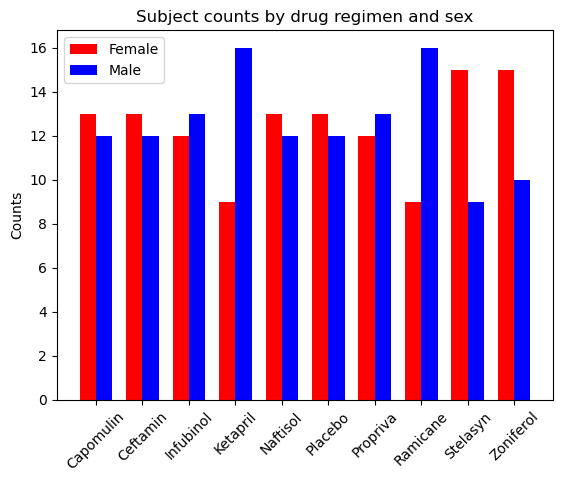

In [3]:
x_pos = np.arange(len(df)) # x-coordinates of the bars

fig = plt.figure()
plt.bar(x_pos, df.Female, width = -0.35, align = 'edge', label = 'Female', color = 'r')
plt.bar(x_pos, df.Male, width = 0.35, align = 'edge', label = 'Male', color = 'b')

plt.ylabel('Counts')
plt.title('Subject counts by drug regimen and sex')

plt.xticks(x_pos, df.index, rotation = 45)
plt.legend();

# fig.savefig("HW7_barplot.png", bbox_inches = 'tight')

(d) Use Pandas to find the average tumor size for each drug regimen, separately at each time-point. Store your results in a Pandas data frame with time point as the index and ten columns (one column per drug regimen). Display your resulting data frame using a print statement. 

**Hint:** Recall, that ```unstack()``` is the opposite of the ```melt()``` procedure. Read up on details in either your text or on the Python documentation website. 

In [4]:
#Combine the two data frames. Mouse ID is the common column.
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
combined_data.head()

df2 = combined_data.groupby(['Timepoint', 'Drug Regimen'])['Tumor Volume (mm3)'].mean()
df2 = df2.unstack(-1)
df2

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.235574,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.066132,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.043900,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.264805,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


(e) Use Matplotlib to create a line-graph of the average tumor size as a function of time for each drug regimen. Include all ten drugs in the same plot and use different colors for different drugs. Make sure to label your plot (include x- and y-axis labels, title, legend for which curve belongs to which drug). Please place the legend outside the plot (you should look up how to do this).

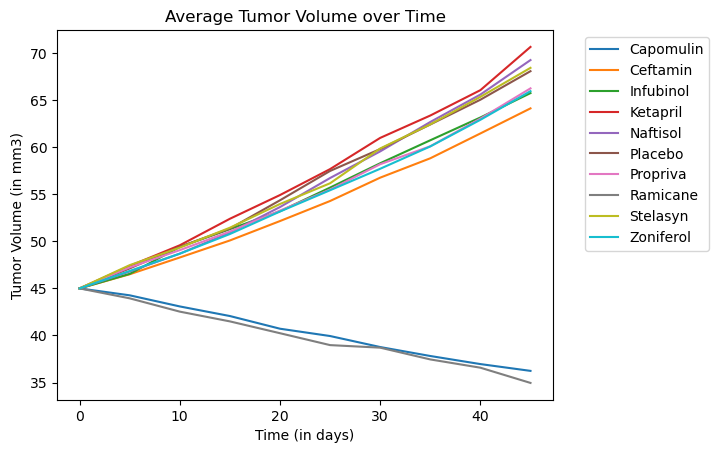

In [6]:
fig, ax = plt.subplots() # make new figure environment

time = np.linspace(0,45,10) # time points

for i in range(10):
    name = df2.columns[i]
    ax.plot(time,df2[name], label = name)
    
ax.set_title("Average Tumor Volume over Time")
ax.set_xlabel('Time (in days)')
ax.set_ylabel('Tumor Volume (in mm3)')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.));

#fig.savefig("HW7_Linegraph.png", bbox_inches = 'tight')

(f) Use Pandas to create a Data Frame that has one row per mouse, index values should be Mouse IDs, and has exactly the following columns: "Weight" (initial mouse weight in grams), "Sex", "Age" (of mouse at the beginning of trial in months), "Tumor" (tumor volume on day 45 - include only mice who lived until day 45), "Drug Regimen". Display your resulting data frame using a print statement. 

In [7]:
df3 = combined_data[combined_data.Timepoint==0]
del df3['Metastatic Sites']
del df3['Timepoint']
del df3['Tumor Volume (mm3)']

final_data = combined_data[combined_data.Timepoint == 45]
final_size = final_data[['Mouse ID', 'Tumor Volume (mm3)']]

df4 = pd.merge(final_size, df3, on = 'Mouse ID')
df4.set_index(['Mouse ID'], inplace = True)
df4 = df4[['Weight (g)', 'Sex', 'Age_months','Tumor Volume (mm3)','Drug Regimen']]
df4

,Weight (g),Sex,Age_months,Tumor Volume (mm3),Drug Regimen
Mouse ID,,,,,
s185,17,Female,3,23.343598,Capomulin
x401,15,Female,16,28.484033,Capomulin
m601,17,Male,22,28.430964,Capomulin
u364,17,Male,18,31.023923,Capomulin
y793,17,Male,17,31.896238,Capomulin
...,...,...,...,...,...
p136,28,Female,5,63.488697,Zoniferol
q511,28,Female,2,68.611061,Zoniferol
q633,25,Male,12,70.827796,Zoniferol


(g) Use Matplotlib to create a scatterplot of final tumor size on day 45 against initial mouse weight for the mice who survived until day 45. Use different colors for different drug treatments. Make sure to label your plot (include x- and y-axis labels, title, and a legend for which color belongs to which drug). Please place the legend outside the plot. 

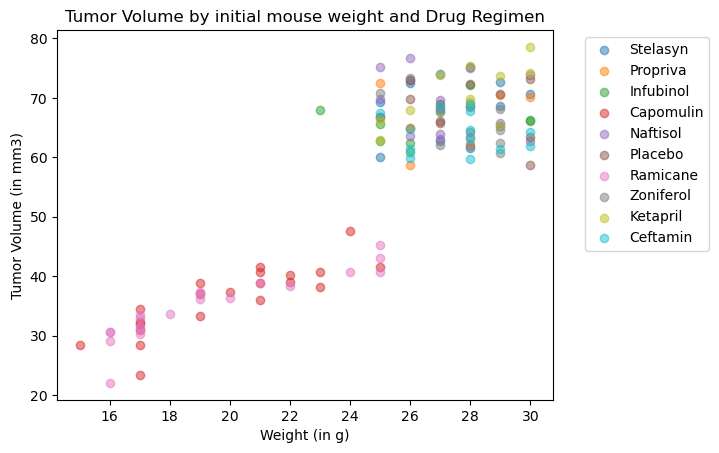

In [8]:
for drug in list(set(df4['Drug Regimen'])):
    temp_df = df4[df4['Drug Regimen']== drug]
    plt.scatter(temp_df['Weight (g)'], temp_df['Tumor Volume (mm3)'], alpha=0.5, label = drug)  

plt.ylabel('Tumor Volume (in mm3)')
plt.xlabel('Weight (in g)')
plt.title('Tumor Volume by initial mouse weight and Drug Regimen')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.));

#fig.savefig("HW7_Scatterplot.png", bbox_inches = 'tight')

(h) Comment on what you see in the plot you just created. Do the mice seem to have been randomly assigned to the treatments? 

No. It seems unlikely that mice were assigned randomly to drugs. (In fact, it heavily looks like these data are faked or artificially simulated). The lower weight mice are predominantly assigned to the drugs Ramicane and Capomulin. 

(i) Create a side-by-side boxplot for initial mouse weight across drug regimens. Order the drugs, so that the boxplots for the drugs "Capomulin" and "Ramicane" appear on the left. 

**Note:** Look at the [matplotlib gallery](https://matplotlib.org/stable/gallery/index.html) and scroll down to the "Statistics" section to understand how to create a side-by-side boxplot. 

**Hint:** start with a list of lists of values you want to plot. 

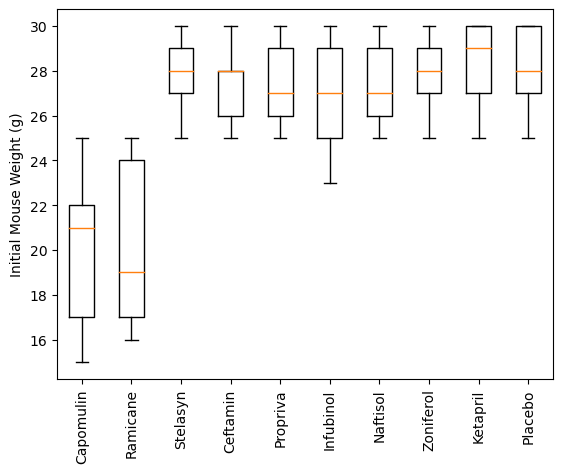

In [10]:
# we want data in form of a list of lists (one list for each drug)! 
# Note, that the lists are not of the same size, so stacking them into one data frame is not a good idea. 

df5 = combined_data[combined_data.Timepoint==0]

data = []
data.append(list(df5[df5['Drug Regimen']=='Capomulin']['Weight (g)']))
data.append(list(df5[df5['Drug Regimen']=='Ramicane']['Weight (g)']))

for drug in list(set(df5['Drug Regimen'])^{'Capomulin', 'Ramicane'}):
    data.append(list(df5[df5['Drug Regimen']==drug]['Weight (g)']))

#fig = plt.figure()
    
plt.boxplot(data)
plt.ylabel("Initial Mouse Weight (g)")
plt.xticks(range(1,11), ['Capomulin', 'Ramicane']+list(set(df5['Drug Regimen'])^{'Capomulin', 'Ramicane'}), rotation = 90);

#fig.savefig("HW7_Boxplot.png", bbox_inches = 'tight')